In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving weather1.csv to weather1.csv


1. Загрузите данные из файла «weather1.csv» о погоде в Перми. Загрузите
только следующие столбцы:
a. Местное время в Перми
b.
T (температура воздуха в градусах Цельсия)
c.
P (атмосферное давление в мм.рт.ст.)
d.
U (относительная влажность в %)
e.
Ff (скорость ветра в м/с)
f.
N (облачность)
g.
H (высота основания облаков, м)
h.
VV (горизонтальная дальность видимости в км)

In [2]:
df = pd.read_csv('weather1.csv',
                  usecols=['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV'],
                  delimiter=';')
df

,Местное время в Перми,T,P,U,Ff,N,H,VV
0,31.12.2021 23:00,-9.8,762.5,83,3,100%.,600-1000,4.0
1,31.12.2021 20:00,-10.6,764.2,81,3,100%.,1000-1500,4.0
2,31.12.2021 17:00,-11.6,765.5,79,2,"90 или более, но не 100%",1000-1500,10.0
3,31.12.2021 14:00,-11.9,766.7,77,1,100%.,1000-1500,20.0
4,31.12.2021 11:00,-13.6,767.5,79,1,100%.,1000-1500,10.0
...,...,...,...,...,...,...,...,...
2914,01.01.2021 14:00,-13.0,778.4,82,3,100%.,600-1000,0.5
2915,01.01.2021 11:00,-12.9,778.4,80,4,100%.,600-1000,2.0
2916,01.01.2021 08:00,-12.4,778.3,79,4,100%.,600-1000,10.0
2917,01.01.2021 05:00,-12.3,778.7,80,4,100%.,600-1000,10.0


2. Постройте точечную диаграмму (диаграмму рассеяния) по
признакам температуры и относительной влажности.

<Axes: xlabel='T', ylabel='U'>

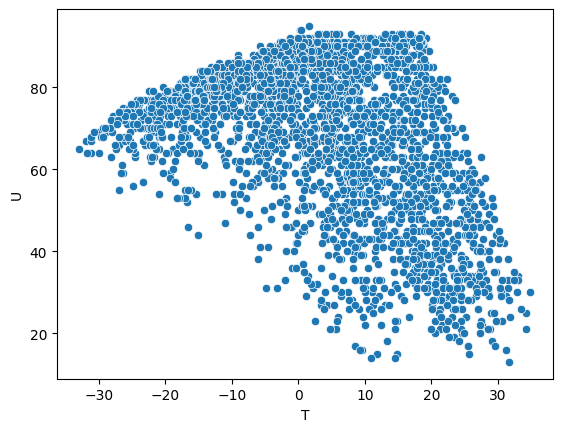

In [3]:
sns.scatterplot(data=df, x="T", y="U")

3. На построенной в предыдущем пункте диаграмме выделите
точки разными цветами в зависимости от облачности: синим – для
которых облачность составляет 100%; красным – все остальные.

<Axes: xlabel='T', ylabel='U'>

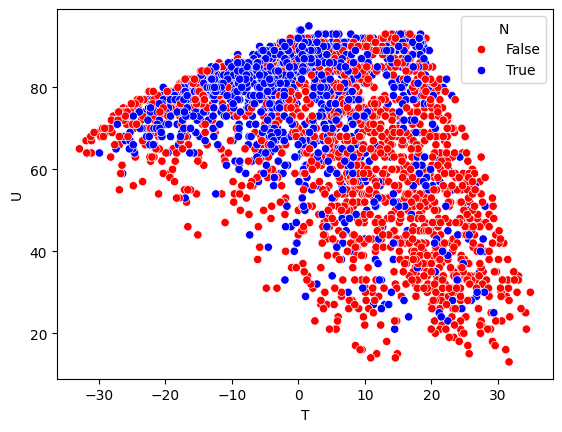

In [4]:
sns.scatterplot(data=df, x='T', y='U', hue=df['N'] == "100%.",
                palette={True: 'blue', False: 'red'})

4. Постройте линейную диаграмму (график) изменения
температуры в зависимости от местного времени.

<Axes: xlabel='Отформатированное время', ylabel='T'>

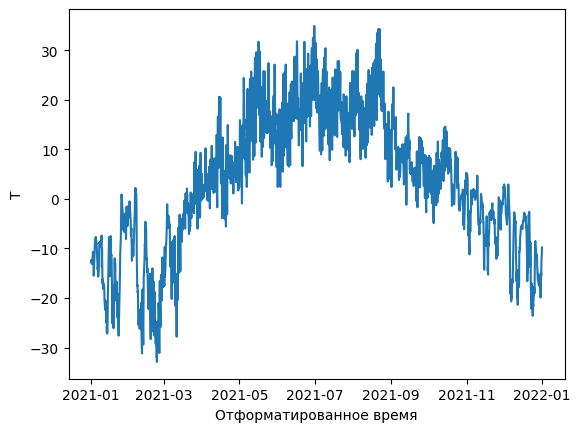

In [16]:
df['Отформатированное время'] = pd.to_datetime(df['Местное время в Перми'], format='%d.%m.%Y %H:%M')
df = df.sort_values('Отформатированное время')
sns.lineplot(data=df, x='Отформатированное время', y='T')

5. Посчитайте по имеющимся данным среднемесячную
температуру и постройте столбчатую диаграмму (вертикальную)
зависимости средней температуры от месяца. Подсказка: создайте
отдельный столбец с номером месяца (вычислив его из столбца
«Местное время»), а затем сгруппируйте данные по этому столбцу.

([<matplotlib.axis.XTick at 0x7ff1b32b7080>,
 [Text(1, 0, 'Янв'),
  Text(2, 0, 'Фев'),
  Text(3, 0, 'Мар'),
  Text(4, 0, 'Апр'),
  Text(5, 0, 'Май'),
  Text(6, 0, 'Июн'),
  Text(7, 0, 'Июл'),
  Text(8, 0, 'Авг'),
  Text(9, 0, 'Сен'),
  Text(10, 0, 'Окт'),
  Text(11, 0, 'Ноя'),
  Text(12, 0, 'Дек')])

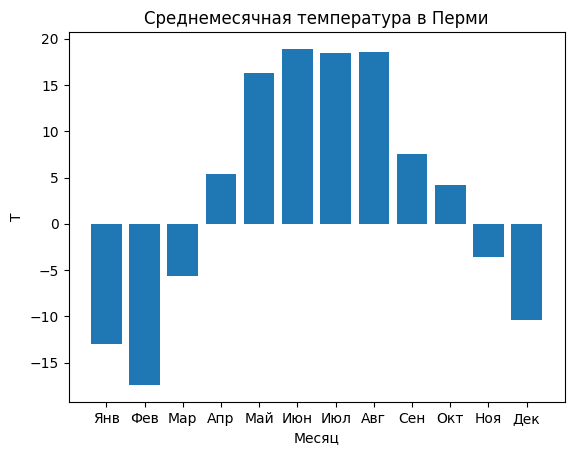

In [17]:
df['Месяц'] = pd.to_datetime(df['Отформатированное время']).dt.month
avg_monthly_tempreature = df.groupby('Месяц')['T'].mean()
plt.bar(avg_monthly_tempreature.index, avg_monthly_tempreature.values)

plt.title('Среднемесячная температура в Перми')
plt.xlabel('Месяц')
plt.ylabel('T')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
                         'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])

6. Постройте ленточную диаграмму (горизонтальную), отразив
на ней количество имеющихся наблюдений для каждого варианта
облачности.

<BarContainer object of 10 artists>

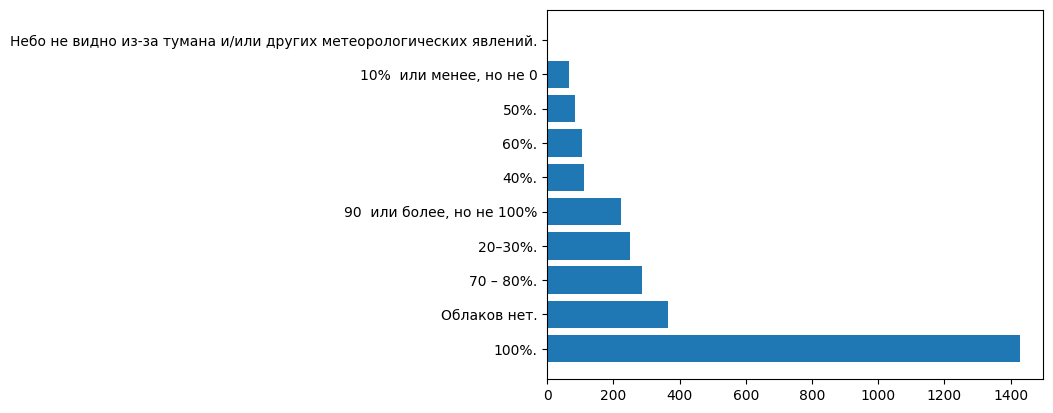

In [18]:
cloud_counts = df['N'].value_counts()

plt.barh(cloud_counts.index.astype(str), cloud_counts.values)

7. Постройте гистограмму частот для температуры. На
гистограмме должно быть 10 диапазонов температуры.

Text(0, 0.5, 'Количество наблюдений')

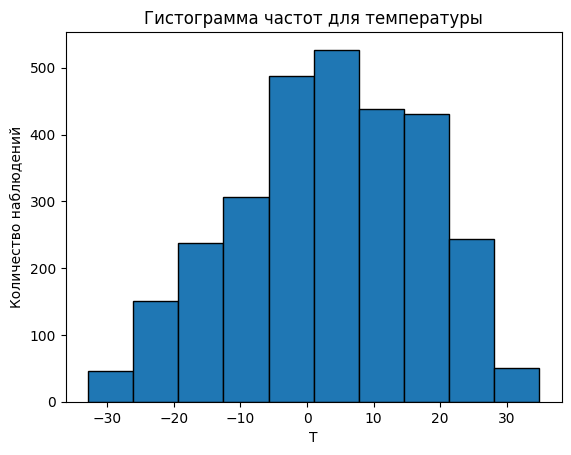

In [19]:
plt.hist(df['T'], bins=10, edgecolor='black')

plt.title('Гистограмма частот для температуры')
plt.xlabel('Т')
plt.ylabel('Количество наблюдений')

8. Разбейте данные на 3 группы по значению горизонтальной
дальности видимости (одна группа – дальность видимости менее 5 км,
вторая – от 5 до 15 км(включительно), третья – более 15 км). В одной
области для каждой группы постройте boxplot (диаграмму «ящик с
усами») для признака «атмосферное давление».

Text(0.5, 0.98, 'Распределение давления по категориям видимости')

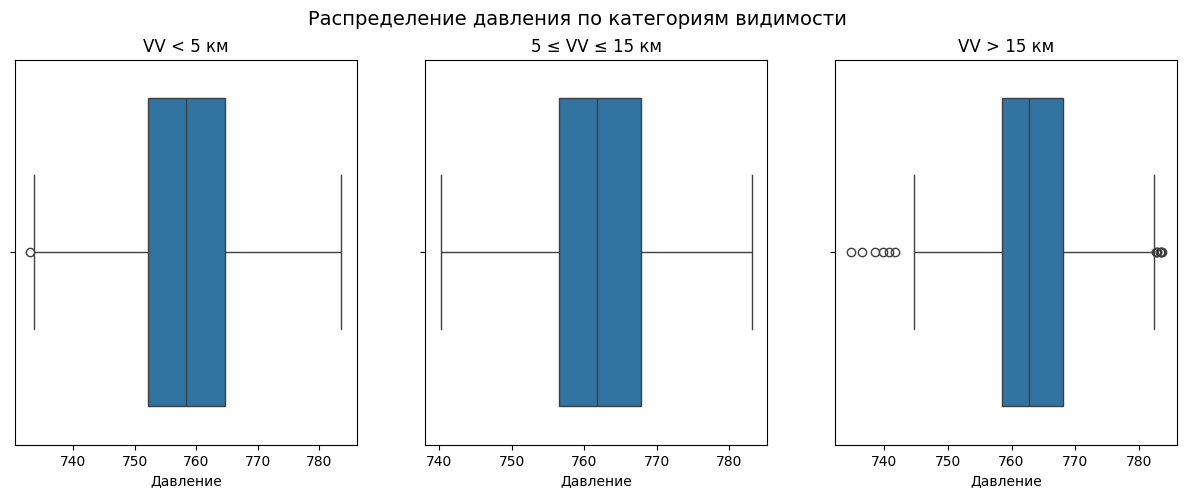

In [20]:
categories = [
    (df['VV'] < 5, 'VV < 5 км'),
    (df['VV'].between(5, 15), '5 ≤ VV ≤ 15 км'),
    (df['VV'] > 15, 'VV > 15 км'),
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (mask, title) in zip(axes, categories):
    sns.boxplot(x=df.loc[mask, 'P'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Давление')

plt.suptitle('Распределение давления по категориям видимости', fontsize=14)

9. (0.5 балла) Постройте круговую диаграмму для признака «высота
основания облаков».

([<matplotlib.patches.Wedge at 0x7ff1b27ef9b0>,
 [Text(0.632566737475607, 0.8999218425171525, '600-1000'),
  Text(-0.9493372646758911, 0.5556606499453575, '1000-1500'),
  Text(-0.7650225969306099, -0.790405229098053, '2000-2500'),
  Text(0.3184621484703823, -1.0528921407207998, '2500 или более, или облаков нет.'),
  Text(0.9692137603063969, -0.5202160001698664, '300-600'),
  Text(1.096257622154599, -0.09065994632661521, '200-300'),
  Text(1.0998798809403825, -0.01625569139011151, '100-200')])

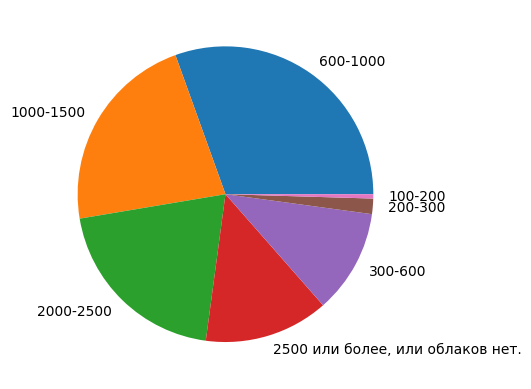

In [22]:
height_cloud_counts = df['H'].value_counts()
fig, ax = plt.subplots()
ax.pie(height_cloud_counts.values, labels=height_cloud_counts.index)